## Yet another extension of (4.2) Example 2

In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
import numpy as np

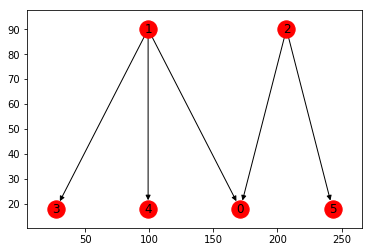

In [2]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3,4,5])
G.add_edges_from([
    (1,0),
    (2,0),
    (1,3),
    (1,4),
    (2,5)
])
nx.draw_networkx(G, pos=graphviz_layout(G, prog='dot'))

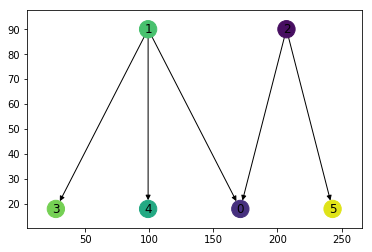

In [3]:
N = nx.number_of_nodes(G)
layout = graphviz_layout(G, prog='dot')
#init = np.random.normal(loc=0, scale=4, size=N)
init = np.random.rand(N)
nx.draw_networkx(G, pos=layout, node_color=init, vmin=0, vmax=1)

Simulate simple consensus

In [4]:
A = nx.adjacency_matrix(G).transpose()
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = A - D
np.linalg.matrix_rank(L)

4

In [5]:
from scipy.integrate import solve_ivp

In [6]:
f1 = lambda t,x: np.asarray(L.dot(x))[0]
res1 = solve_ivp(fun=f1, t_span=[0,10], y0=init)

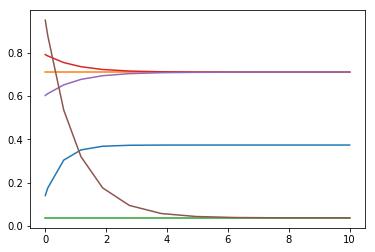

In [7]:
for i in np.arange(0,N):
    plt.plot(res1.t, res1.y[i,:])

In [8]:
res1.y[:,-1]

array([0.37327233, 0.70984809, 0.03670617, 0.70985253, 0.70984221,
       0.03675604])

### Symmetrization

In [9]:
from scipy.linalg import null_space
from scipy.linalg import solve_lyapunov

In [10]:
Q = null_space(null_space(L).transpose()).transpose()
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [11]:
f2 = lambda t,x: eqL.dot(x)
res2 = solve_ivp(fun=f2, t_span=[0,10], y0=init)

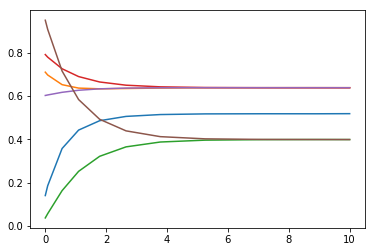

In [12]:
for i in np.arange(0,N):
    plt.plot(res2.t, res2.y[i,:], label=i)

In [18]:
res2.y[:,-1]

array([0.51818343, 0.63805372, 0.39860705, 0.63804079, 0.63802951,
       0.3986438 ])

Create undirected graph from the equivalent Laplacian

In [13]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [14]:
nx.is_connected(eqG)

True

In [15]:
np.sum(eqL, axis=1)

array([ 3.88578059e-16, -4.71844785e-16, -3.33066907e-16,  8.18789481e-16,
       -8.91647867e-16, -1.11022302e-16])

In [16]:
eqL

array([[-1.6119403 ,  0.44776119,  0.53731343,  0.17910448,  0.17910448,
         0.26865672],
       [ 0.44776119, -0.79104478, -0.14925373,  0.28358209,  0.28358209,
        -0.07462687],
       [ 0.53731343, -0.14925373, -0.67910448, -0.05970149, -0.05970149,
         0.41044776],
       [ 0.17910448,  0.28358209, -0.05970149, -0.68656716,  0.31343284,
        -0.02985075],
       [ 0.17910448,  0.28358209, -0.05970149,  0.31343284, -0.68656716,
        -0.02985075],
       [ 0.26865672, -0.07462687,  0.41044776, -0.02985075, -0.02985075,
        -0.54477612]])

In [17]:
np.diag(eqL)

array([-1.6119403 , -0.79104478, -0.67910448, -0.68656716, -0.68656716,
       -0.54477612])

Final result

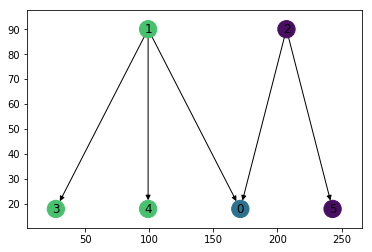

In [19]:
nx.draw_networkx(G, node_color = res1.y[:,-1], pos=layout, vmin=0, vmax=1)

In [20]:
np.linalg.matrix_rank(eqL)

4

In [21]:
negG = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] < -1e-6):
            negG.add_edge(i,j)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


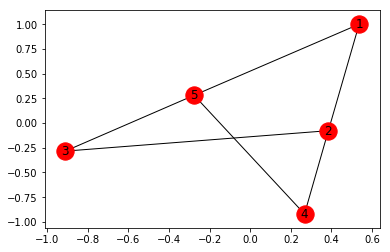

In [22]:
nx.draw_networkx(negG)

In [23]:
posG = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] > 1e-6):
            posG.add_edge(i,j)

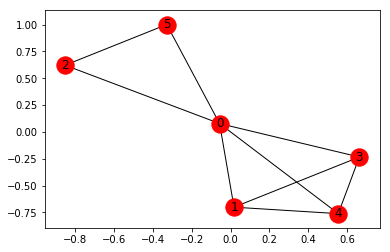

In [24]:
nx.draw_networkx(posG)

In [25]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        if(np.abs(eqL[i,j]) > 1e-6):
            eqG.add_edge(i,j,weight=eqL[i,j])

In [26]:
g_neg = eqG.subgraph([1,2,3,4,5])

In [27]:
np.linalg.eig(nx.laplacian_matrix(g_neg).todense())

(array([-3.53784177e-01,  6.34800372e-17,  6.86492320e-01,  6.22515738e-01,
         8.20895522e-01]),
 matrix([[-4.42703333e-01,  4.47213595e-01, -7.56490081e-01,
          -1.78147456e-01,  2.29662379e-14],
         [ 6.07039431e-01,  4.47213595e-01, -2.35292871e-01,
           6.13302856e-01,  5.96498401e-15],
         [-3.21397894e-01,  4.47213595e-01,  4.16697176e-01,
           1.51877770e-01, -7.07106781e-01],
         [-3.21397894e-01,  4.47213595e-01,  4.16697176e-01,
           1.51877770e-01,  7.07106781e-01],
         [ 4.78459690e-01,  4.47213595e-01,  1.58388600e-01,
          -7.38910939e-01, -8.50907212e-16]]))

In [28]:
nx.laplacian_matrix(g_neg).todense()

matrix([[ 0.34328358,  0.14925373, -0.28358209, -0.28358209,  0.07462687],
        [ 0.14925373,  0.14179104,  0.05970149,  0.05970149, -0.41044776],
        [-0.28358209,  0.05970149,  0.50746269, -0.31343284,  0.02985075],
        [-0.28358209,  0.05970149, -0.31343284,  0.50746269,  0.02985075],
        [ 0.07462687, -0.41044776,  0.02985075,  0.02985075,  0.2761194 ]])